# Estadística

## Generación de datos

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd

In [67]:
altura = []
peso = []
longitud_colmillo = []
for i in range(100):
    b = random.randint(5, 20)
    a = random.randint(-10, 30)
    altura.append(b)
    y = 0.1*a + 1.2*b 
    peso.append(y)
    longitud_colmillo.append(round(random.gauss(14, 4),1))

In [68]:
datos = pd.DataFrame({"altura_cm":altura, "peso_kg":peso, "longitud_colmillo_mm":longitud_colmillo})
datos.head()

,altura_cm,peso_kg,longitud_colmillo_mm
0,17,21.6,14.4
1,14,17.0,10.7
2,15,18.5,15.9
3,17,22.6,8.3
4,11,14.5,10.8


## Una variable

In [71]:
datos.describe()

,altura_cm,peso_kg,longitud_colmillo_mm
count,100.000000,100.000000,100.000000
mean,12.180000,15.559000,13.981000
std,4.522402,5.567929,3.547818
min,5.000000,5.000000,4.800000
25%,8.000000,10.800000,11.375000
50%,12.000000,15.150000,13.500000
75%,16.000000,19.875000,16.600000
max,20.000000,25.800000,23.400000


Para análisis de una sola variable se utiliza la población cuando se trabaja con todos los datos
de una población, y se usa la muestra cuando se trabaja con un subconjunto aleatorio de datos
de la población. Se define la media y la desviación estandar como:

<img src="unavariable.png">

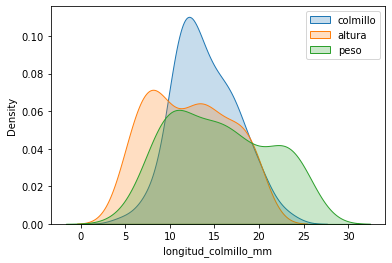

In [72]:
sns.kdeplot(data=datos, x="longitud_colmillo_mm", fill=True, label="colmillo")
sns.kdeplot(data=datos, x="altura_cm", fill=True, label="altura")
sns.kdeplot(data=datos, x="peso_kg", fill=True, label="peso")
plt.legend()
plt.show()

In [ ]:
Vemos que los datos colmillo estan mas relacionados

## Dos variables

Para el caso de dos variables se define la covarianza y la correlación como:
<img src="dosvariables.png">

La covarianza se calcula fácilmente como:

In [73]:
datos.cov()

,altura_cm,peso_kg,longitud_colmillo_mm
altura_cm,20.452121,24.650889,0.273152
peso_kg,24.650889,31.001837,0.681637
longitud_colmillo_mm,0.273152,0.681637,12.587009


Note que la raiz cuadrada de la covarianza de una variable consigo misma es igual 
a la desviación estandar de la variable, es decir la covarianza de una variable consigo misma 
es la varianza. Una covarianza alta entre dos variables denota una relación entre ellas.

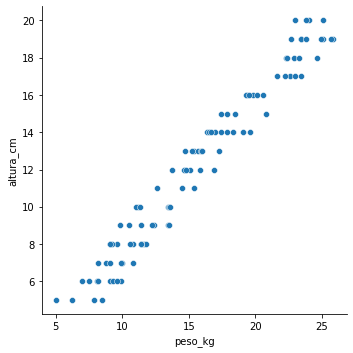

In [74]:
sns.relplot(data=datos, x="peso_kg", y="altura_cm")
plt.show()

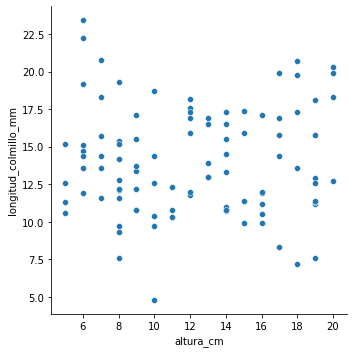

In [75]:
sns.relplot(data=datos, x="altura_cm", y="longitud_colmillo_mm")
plt.show()

In [76]:
datos.corr()

,altura_cm,peso_kg,longitud_colmillo_mm
altura_cm,1.000000,0.978971,0.017024
peso_kg,0.978971,1.000000,0.034506
longitud_colmillo_mm,0.017024,0.034506,1.000000


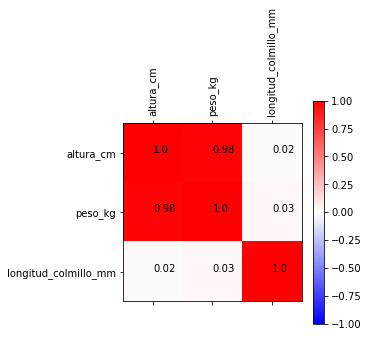

In [84]:
matriz = datos.corr()
plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)
plt.xticks(range(3), datos.columns, rotation=90)
plt.yticks(range(3), datos.columns)
for i in range(len(datos.columns)):
    for j in range(len(datos.columns)):
        plt.text(i, j, round(matriz.iloc[i, j],2))
plt.colorbar()
plt.show()